Importing Necessary Libraries into the Notebook

> Pandas library for data manipulation

> Numpy library for analysis

> Random library for generating random values

In [5]:
import pandas as pd
import numpy as np
import random

In [6]:
np.random.seed(42)

In [7]:
n = 1000

Defining the columns for the random data to be put into

In [8]:
job_titles = ['CEO', 'CTO', 'COO', 'CMO', 'Marketing Head', 'GTM Head', 'Recruiter']
company_sizes = ['Startup', 'Scaleup', 'SMB', 'Enterprise', 'Corporation']
industries = ['Fintech', 'Healthcare', 'AI', 'Construction', 'Defence']
locations = ['India', 'United States', 'United Kingdom', 'Canada', 'China']
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',]

Creating a function to simulate replies based on their job title, location, day of week and personalization

The base probablity is 0.1

If email is sent to Marketing Head, GTM Head or Recruiter, we add 0.3 to base probablity.

If email is sent to location India, United States or Canada, we add 0.2 to base probablity

If email is sent on days Monday and Tuesday, we add 0.2 to base probablity

If email personalization score is >7, add 0.15 to base probablity

In [9]:
def simulate_reply(job_titles, location, day, personalization):
  base = 0.1
  if job_title in ['Marketing Head', 'GTM Head', 'Recruiter']:
    base += 0.3
  if location in ['India', 'United States', 'Canada']:
    base += 0.2
  if day in ['Monday', 'Tuesday']:
    base += 0.2
  if personalization_score > 7:
    base += 0.15
  return min(base, 1)

Defining random values to be put into columns


In [10]:
data = []

for i in range(n):
    job_title = random.choice(job_titles)
    company_size = random.choice(company_sizes)
    industry = random.choice(industries)
    location = random.choice(locations)
    day = random.choice(days)
    personalization_score = random.randint(1, 10)
    subject_length = random.randint(3, 15)
    followups_sent = random.randint(0, 3)

    prob_reply = simulate_reply(job_title, location, day, personalization_score)
    replied = int(np.random.rand() < prob_reply)

    data.append([
        f"L{i:4}", job_title, company_size, industry, location,
        personalization_score, subject_length, day, followups_sent, replied])

Converting the randomly generated data into Pandas Dataframe

In [11]:
df = pd.DataFrame(data, columns=[
    'lead_id', 'job_title', 'company_size', 'industry', 'location',
    'personalization_score', 'subject_length', 'day_sent', 'followups_sent', 'replied'])

Displaying the first 19 rows with the randomly filled values

In [12]:
df.iloc[1:20]

,lead_id,job_title,company_size,industry,location,personalization_score,subject_length,day_sent,followups_sent,replied
1,L 1,Recruiter,Enterprise,AI,United Kingdom,6,14,Monday,2,0
2,L 2,COO,SMB,Defence,United States,4,11,Tuesday,2,0
3,L 3,Marketing Head,Corporation,Fintech,Canada,3,14,Thursday,2,1
4,L 4,GTM Head,Enterprise,Fintech,India,10,12,Thursday,3,1
5,L 5,GTM Head,Corporation,AI,United States,4,13,Wednesday,3,1
6,L 6,CMO,Scaleup,AI,India,8,7,Monday,2,1
7,L 7,Marketing Head,Corporation,Construction,United States,3,7,Monday,0,0
8,L 8,COO,Startup,Construction,United States,8,4,Monday,0,1
9,L 9,Marketing Head,SMB,Healthcare,China,8,11,Monday,2,1
10,L 10,COO,Startup,Healthcare,United Kingdom,9,15,Friday,3,1


That was the end of Step of data generation. Now since we have the data generated and in a pandas dataframe, we can start with the analysis.

We're going to start by importing matplotlib and sns for visual analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Now we're going to print the actual number of people who replied vs who didn't reply

In [14]:
print("Reply Rate:")
df['replied'].value_counts()

Reply Rate:


,count
replied,
0,520
1,480


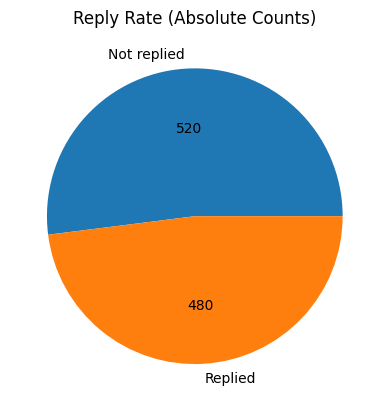

In [15]:
reply_counts = df['replied'].value_counts().sort_index()
labels = ['Not replied', 'Replied']
plt.pie(reply_counts, labels=labels, autopct=lambda p: f'{int(p * sum(reply_counts) / 100)}')
plt.title('Reply Rate (Absolute Counts)')
plt.show()

This means that 520 people have not replied vs 480 that have replied.

Now let's look at total replies by Job Titles

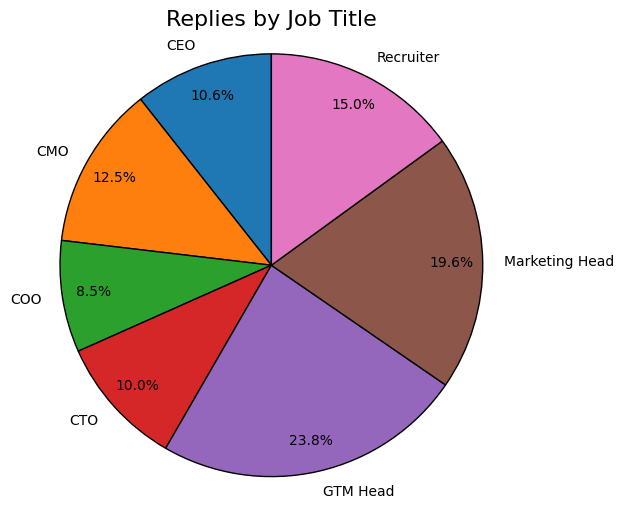

In [16]:
reply_totals = df.groupby('job_title')['replied'].sum().reset_index()
reply_totals.rename(columns={'replied': 'total_replies'}, inplace=True)

plt.figure(figsize=(6, 6))

plt.pie(
    reply_totals['total_replies'],
    labels=reply_totals['job_title'],
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'black'}
)

plt.axis('equal')
plt.title("Replies by Job Title", fontsize=16)

plt.show()

The graph above clearly shows that GTM Head has the highest reply rate followed by Marketing Head and Recruiter. COO and CTOs have the lowest reply rates among all. This clearly shows that if we want to get replies, we need to email GTM Head, Marketing Head, and Recruiter.

Now let's look at reply rates by company sizes.

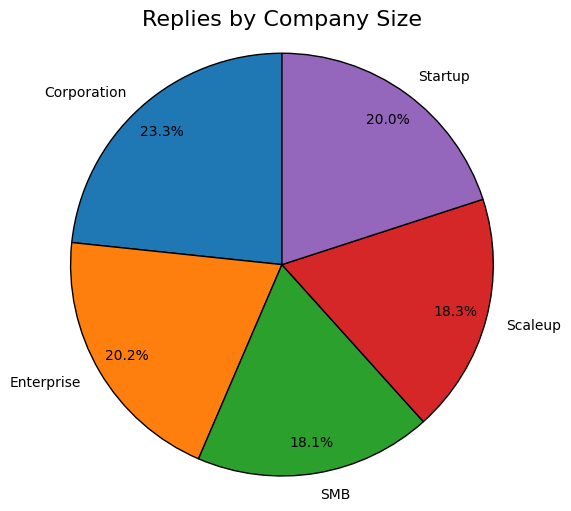

In [17]:
reply_totals = df.groupby('company_size')['replied'].sum().reset_index()
reply_totals.rename(columns={'replied': 'total_replies'}, inplace=True)

plt.figure(figsize=(6, 6))

plt.pie(
    reply_totals['total_replies'],
    labels=reply_totals['company_size'],
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'black'}
)

plt.axis('equal')
plt.title("Replies by Company Size", fontsize=16)

plt.show()

The bar chart shows Corporations and Enterprises have the highest reply rate followed closely by startups and scaleups. Therefore it is recommended to go after Corporations for higher reply rates.

Next we are going to look at how the replies differ by days.

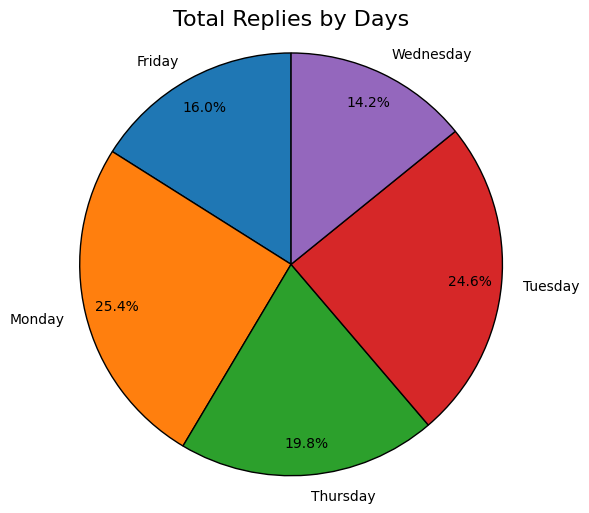

In [18]:
reply_totals = df.groupby('day_sent')['replied'].sum().reset_index()
reply_totals.rename(columns={'replied': 'total_replies'}, inplace=True)

plt.figure(figsize=(6, 6))

plt.pie(
    reply_totals['total_replies'],
    labels=reply_totals['day_sent'],
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'black'}
)

plt.axis('equal')
plt.title("Total Replies by Days", fontsize=16)

plt.show()

We can clearly see that Monday is when most people reply followed by Tuesday and then the other 3 workdays.

So it is clear that if you send an email on Monday or Tuesday you are more likely to receive a reply.

Now let's see from which location we get the most replies

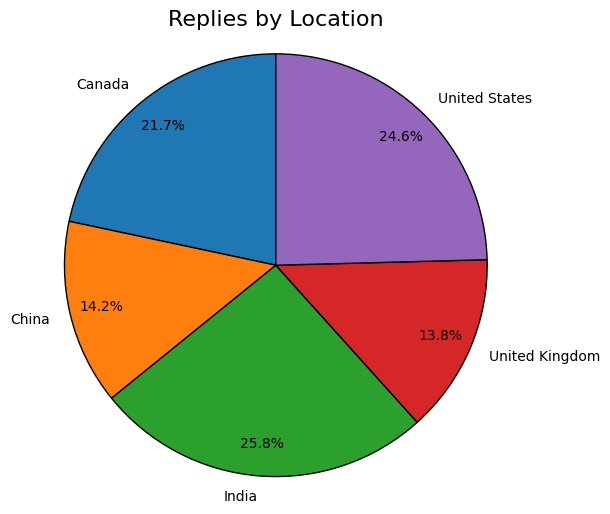

In [19]:
reply_totals = df.groupby('location')['replied'].sum().reset_index()
reply_totals.rename(columns={'replied': 'total_replies'}, inplace=True)

plt.figure(figsize=(6, 6))

plt.pie(
    reply_totals['total_replies'],
    labels=reply_totals['location'],
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'black'}
)

plt.axis('equal')
plt.title("Replies by Location", fontsize=16)

plt.show()

We can clearly see from the graph we get the most replies from India, followed by US and then Canada. China and The United Kingdom have slighly lesser replies compared to other countries.

We should keep focus on Canada, US and India for higher reply rates.

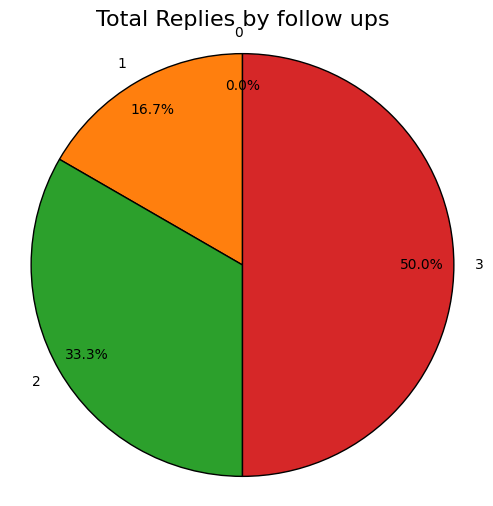

In [20]:
reply_totals = df.groupby('followups_sent')['replied'].sum().reset_index()
reply_totals.rename(columns={'replied': 'total_replies'}, inplace=True)

plt.figure(figsize=(6, 6))

plt.pie(
    reply_totals['followups_sent'],
    labels=reply_totals['followups_sent'],
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'black'}
)

plt.axis('equal')
plt.title("Total Replies by follow ups", fontsize=16)

plt.show()

This chart shows the more times we follow up, the more likely we're to get a reply from the recipient.

### Lead Scoring Function

This function calculates a **lead score** based on:

- **Job Title**: Assigns higher points to important titles like CEO and CTO  
- **Personalization Score**: Adds extra points based on how personalized the outreach was

This rule-based scoring system helps prioritize leads for outbound campaigns without using machine learning.

In [24]:
def score_lead(row):
    score = 0

    # Weight job titles
    if row['job_title'] in ['CEO', 'CTO']:
        score += 30
    elif row['job_title'] == 'VP Sales':
        score += 20
    elif row['job_title'] == 'Marketing Manager':
        score += 15
    else:
        score += 10

    # Add personalization score (scale up impact)
    score += row['personalization_score'] * 3

    return score


### Applying the Scoring Function

We now apply the **score_lead** function to each row in the dataset to calculate a lead score for every lead.

The new `lead_score` column will help identify which leads to prioritize in cold outreach campaigns.


In [22]:
# Apply to dataframe
df['lead_score'] = df.apply(score_lead, axis=1)

### Displaying Top Leads

Finally, we sort the leads by their score in **descending order** to see the top 10 highest-priority leads.

These are the leads most likely to respond based on their job title and how personalized the outreach was.


In [23]:
# Show top 10 leads
df[['lead_id', 'job_title', 'personalization_score', 'lead_score']].sort_values('lead_score', ascending=False).head(10)

,lead_id,job_title,personalization_score,lead_score
949,L 949,CEO,10,60
772,L 772,CTO,10,60
66,L 66,CEO,10,60
70,L 70,CTO,10,60
802,L 802,CTO,10,60
803,L 803,CEO,10,60
62,L 62,CTO,10,60
831,L 831,CTO,10,60
853,L 853,CTO,10,60
47,L 47,CTO,10,60
